In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv('600K US Housing Properties.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   property_url        600000 non-null  object 
 1   property_id         600000 non-null  int64  
 2   address             600000 non-null  object 
 3   street_name         599869 non-null  object 
 4   apartment           14815 non-null   object 
 5   city                599999 non-null  object 
 6   state               599999 non-null  object 
 7   latitude            529122 non-null  float64
 8   longitude           529122 non-null  float64
 9   postcode            599970 non-null  object 
 10  price               600000 non-null  float64
 11  bedroom_number      443845 non-null  float64
 12  bathroom_number     471733 non-null  float64
 13  price_per_unit      435365 non-null  float64
 14  living_space        447847 non-null  float64
 15  land_space          515119 non-nul

In [4]:
description = df.describe(include='all')
description

,property_url,property_id,address,street_name,apartment,city,state,latitude,longitude,postcode,...,property_type,property_status,year_build,total_num_units,listing_age,RunDate,agency_name,agent_name,agent_phone,is_owned_by_zillow
count,600000,6.000000e+05,600000,599869,14815,599999,599999,529122.000000,529122.000000,599970,...,600000,600000,0.0,0.0,600000.0,600000,444524,0.0,0.0,600000.000000
unique,600000,NaN,598588,339224,2664,7977,25,NaN,NaN,10820,...,7,2,NaN,NaN,NaN,1,34372,NaN,NaN,NaN
top,https://www.zillow.com/homedetails/3-Plat-83-1...,NaN,"(undisclosed Address), Rockport, TX 78382",(undisclosed Address),1,Chicago,TX,NaN,NaN,84043,...,SINGLE_FAMILY,FOR_SALE,NaN,NaN,NaN,2022-04-24 07:34:15,Coldwell Banker Realty,NaN,NaN,NaN
freq,1,NaN,36,1713,312,14138,146636,NaN,NaN,1102,...,354366,383365,NaN,NaN,NaN,600000,5936,NaN,NaN,NaN
mean,NaN,8.885042e+08,NaN,NaN,NaN,NaN,NaN,36.282379,-105.813906,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,0.000498
std,NaN,9.724708e+08,NaN,NaN,NaN,NaN,NaN,5.673355,13.464633,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.022318
min,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,18.985142,-165.408250,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,0.000000
25%,NaN,5.402143e+07,NaN,NaN,NaN,NaN,NaN,32.612112,-117.346079,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,0.000000
50%,NaN,2.066090e+08,NaN,NaN,NaN,NaN,NaN,35.403568,-101.897378,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,0.000000
75%,NaN,2.066867e+09,NaN,NaN,NaN,NaN,NaN,39.661674,-95.354245,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,0.000000


In [5]:
description.loc['mean'].isna()

property_url           True
property_id           False
address                True
street_name            True
apartment              True
city                   True
state                  True
latitude              False
longitude             False
postcode               True
price                 False
bedroom_number        False
bathroom_number       False
price_per_unit        False
living_space          False
land_space            False
land_space_unit        True
broker_id              True
property_type          True
property_status        True
year_build             True
total_num_units        True
listing_age           False
RunDate                True
agency_name            True
agent_name             True
agent_phone            True
is_owned_by_zillow    False
Name: mean, dtype: bool

In [6]:
numeric= df.select_dtypes(include=np.number).columns.tolist()
numeric

['property_id',
 'latitude',
 'longitude',
 'price',
 'bedroom_number',
 'bathroom_number',
 'price_per_unit',
 'living_space',
 'land_space',
 'broker_id',
 'year_build',
 'total_num_units',
 'listing_age',
 'agent_name',
 'agent_phone',
 'is_owned_by_zillow']

In [7]:
correlation = df[numeric].corr()
correlation 

,property_id,latitude,longitude,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,broker_id,year_build,total_num_units,listing_age,agent_name,agent_phone,is_owned_by_zillow
property_id,1.000000,-0.038340,0.066549,-0.019347,0.003238,-0.005831,0.000625,0.014867,-0.145151,NaN,NaN,NaN,NaN,NaN,NaN,-0.018416
latitude,-0.038340,1.000000,-0.247149,0.000276,-0.000550,0.008870,0.002212,-0.006470,-0.014753,NaN,NaN,NaN,NaN,NaN,NaN,-0.001885
longitude,0.066549,-0.247149,1.000000,-0.066183,-0.002655,-0.017514,-0.005062,0.000444,-0.004091,NaN,NaN,NaN,NaN,NaN,NaN,-0.009663
price,-0.019347,0.000276,-0.066183,1.000000,0.020376,0.104946,0.024502,0.036470,-0.012864,NaN,NaN,NaN,NaN,NaN,NaN,-0.000927
bedroom_number,0.003238,-0.000550,-0.002655,0.020376,1.000000,0.644056,0.000116,0.001426,0.001228,NaN,NaN,NaN,NaN,NaN,NaN,0.000046
bathroom_number,-0.005831,0.008870,-0.017514,0.104946,0.644056,1.000000,0.000349,0.000719,-0.000312,NaN,NaN,NaN,NaN,NaN,NaN,0.000380
price_per_unit,0.000625,0.002212,-0.005062,0.024502,0.000116,0.000349,1.000000,-0.000272,-0.001234,NaN,NaN,NaN,NaN,NaN,NaN,0.000430
living_space,0.014867,-0.006470,0.000444,0.036470,0.001426,0.000719,-0.000272,1.000000,-0.009439,NaN,NaN,NaN,NaN,NaN,NaN,-0.000341
land_space,-0.145151,-0.014753,-0.004091,-0.012864,0.001228,-0.000312,-0.001234,-0.009439,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.011500
broker_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
correlation = correlation.dropna(axis=0, how='all')
correlation

,property_id,latitude,longitude,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,broker_id,year_build,total_num_units,listing_age,agent_name,agent_phone,is_owned_by_zillow
property_id,1.000000,-0.038340,0.066549,-0.019347,0.003238,-0.005831,0.000625,0.014867,-0.145151,NaN,NaN,NaN,NaN,NaN,NaN,-0.018416
latitude,-0.038340,1.000000,-0.247149,0.000276,-0.000550,0.008870,0.002212,-0.006470,-0.014753,NaN,NaN,NaN,NaN,NaN,NaN,-0.001885
longitude,0.066549,-0.247149,1.000000,-0.066183,-0.002655,-0.017514,-0.005062,0.000444,-0.004091,NaN,NaN,NaN,NaN,NaN,NaN,-0.009663
price,-0.019347,0.000276,-0.066183,1.000000,0.020376,0.104946,0.024502,0.036470,-0.012864,NaN,NaN,NaN,NaN,NaN,NaN,-0.000927
bedroom_number,0.003238,-0.000550,-0.002655,0.020376,1.000000,0.644056,0.000116,0.001426,0.001228,NaN,NaN,NaN,NaN,NaN,NaN,0.000046
bathroom_number,-0.005831,0.008870,-0.017514,0.104946,0.644056,1.000000,0.000349,0.000719,-0.000312,NaN,NaN,NaN,NaN,NaN,NaN,0.000380
price_per_unit,0.000625,0.002212,-0.005062,0.024502,0.000116,0.000349,1.000000,-0.000272,-0.001234,NaN,NaN,NaN,NaN,NaN,NaN,0.000430
living_space,0.014867,-0.006470,0.000444,0.036470,0.001426,0.000719,-0.000272,1.000000,-0.009439,NaN,NaN,NaN,NaN,NaN,NaN,-0.000341
land_space,-0.145151,-0.014753,-0.004091,-0.012864,0.001228,-0.000312,-0.001234,-0.009439,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.011500
is_owned_by_zillow,-0.018416,-0.001885,-0.009663,-0.000927,0.000046,0.000380,0.000430,-0.000341,0.011500,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [9]:
correlation = correlation.dropna(axis=1, how='all')
correlation

,property_id,latitude,longitude,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,is_owned_by_zillow
property_id,1.000000,-0.038340,0.066549,-0.019347,0.003238,-0.005831,0.000625,0.014867,-0.145151,-0.018416
latitude,-0.038340,1.000000,-0.247149,0.000276,-0.000550,0.008870,0.002212,-0.006470,-0.014753,-0.001885
longitude,0.066549,-0.247149,1.000000,-0.066183,-0.002655,-0.017514,-0.005062,0.000444,-0.004091,-0.009663
price,-0.019347,0.000276,-0.066183,1.000000,0.020376,0.104946,0.024502,0.036470,-0.012864,-0.000927
bedroom_number,0.003238,-0.000550,-0.002655,0.020376,1.000000,0.644056,0.000116,0.001426,0.001228,0.000046
bathroom_number,-0.005831,0.008870,-0.017514,0.104946,0.644056,1.000000,0.000349,0.000719,-0.000312,0.000380
price_per_unit,0.000625,0.002212,-0.005062,0.024502,0.000116,0.000349,1.000000,-0.000272,-0.001234,0.000430
living_space,0.014867,-0.006470,0.000444,0.036470,0.001426,0.000719,-0.000272,1.000000,-0.009439,-0.000341
land_space,-0.145151,-0.014753,-0.004091,-0.012864,0.001228,-0.000312,-0.001234,-0.009439,1.000000,0.011500
is_owned_by_zillow,-0.018416,-0.001885,-0.009663,-0.000927,0.000046,0.000380,0.000430,-0.000341,0.011500,1.000000


<AxesSubplot:>

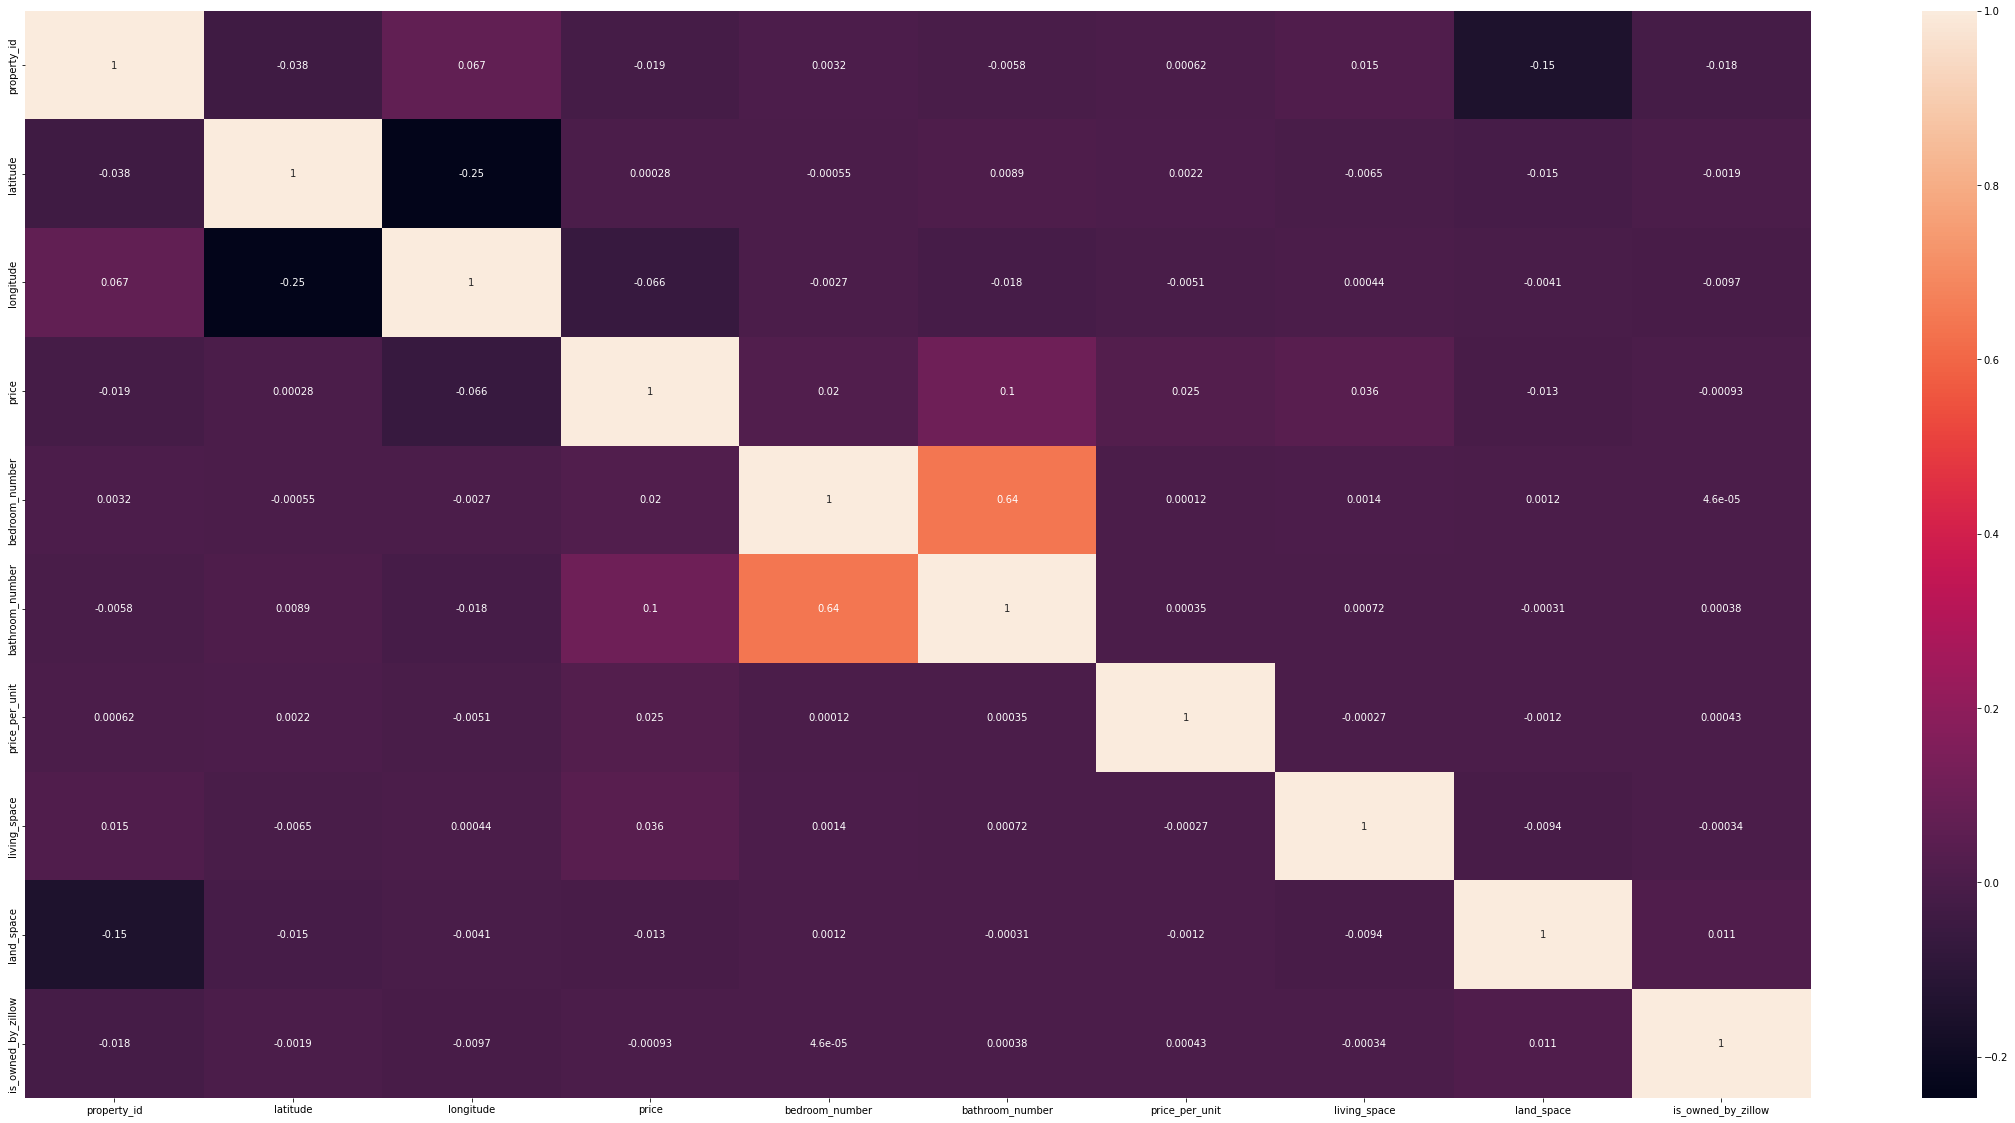

In [10]:
# Make a heatmap of the data 
plt.figure(figsize=(40,20))
sns.heatmap(correlation, annot=True)

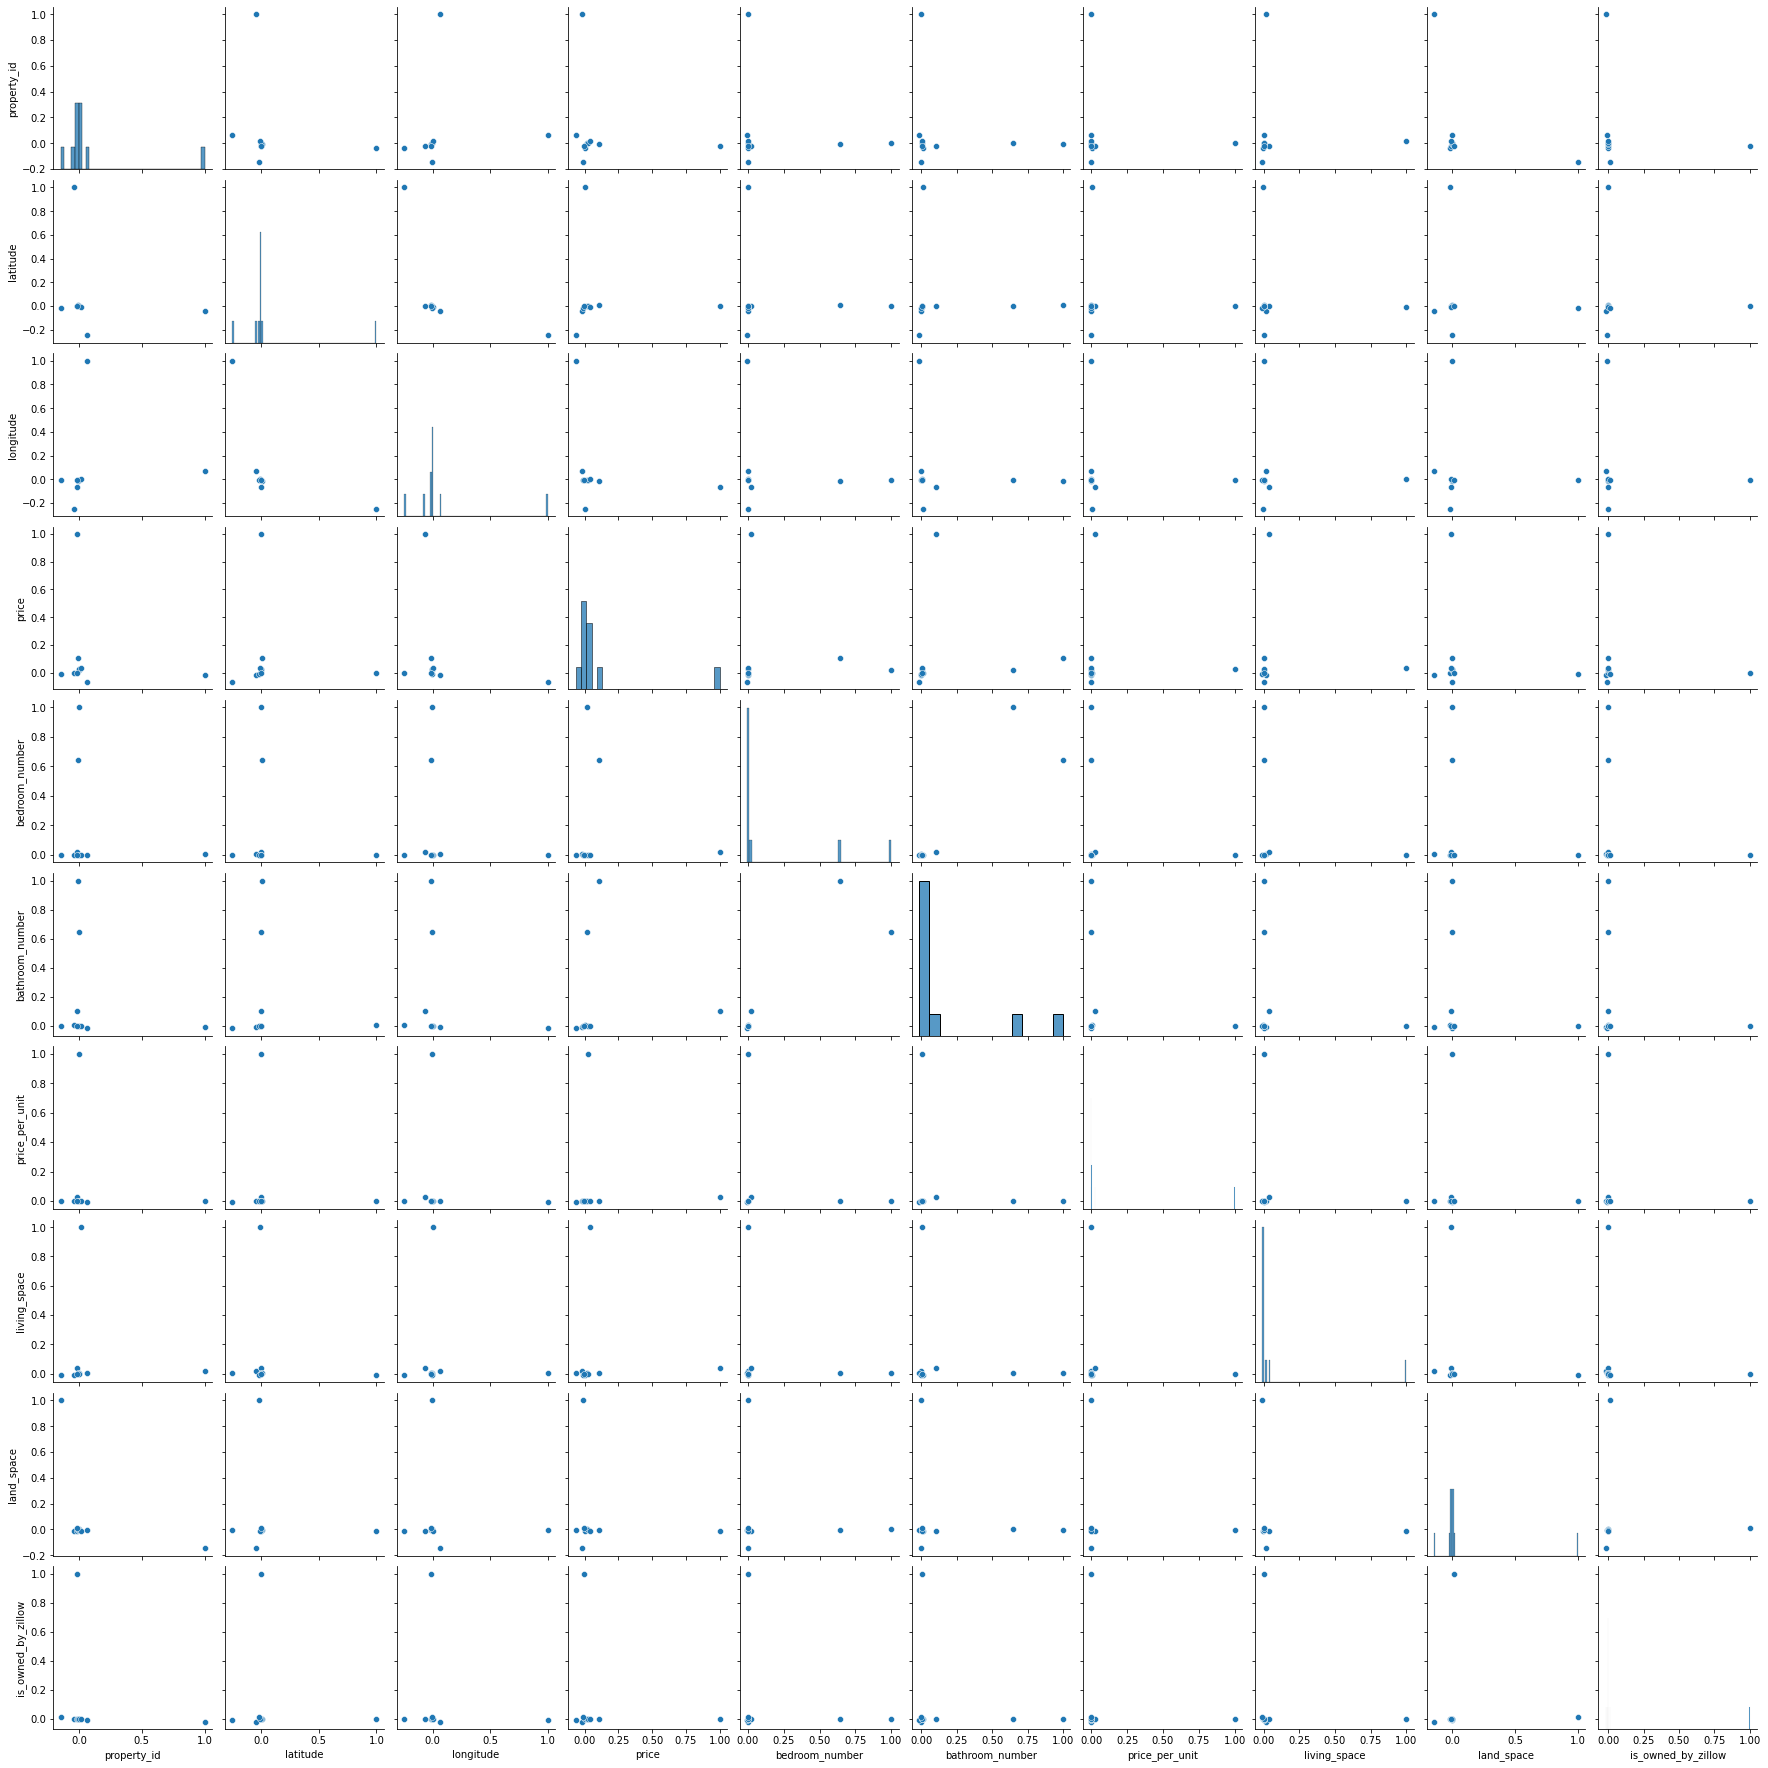

In [11]:
sns.pairplot(correlation)

array([<AxesSubplot:title={'center':'price'}, xlabel='state'>],
      dtype=object)

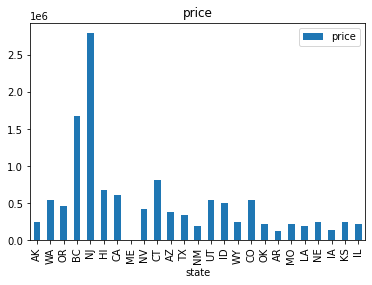

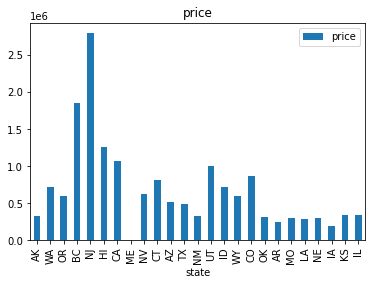

In [12]:
median=df.groupby('state', as_index=False, sort=False).agg({'price':'median'}).round()
mean=df.groupby('state', as_index=False, sort=False).agg({'price':'mean'}).round()

median.plot(subplots=True, x='state', kind='bar', label='median')
mean.plot(subplots=True, x='state', kind='bar', label='mean')

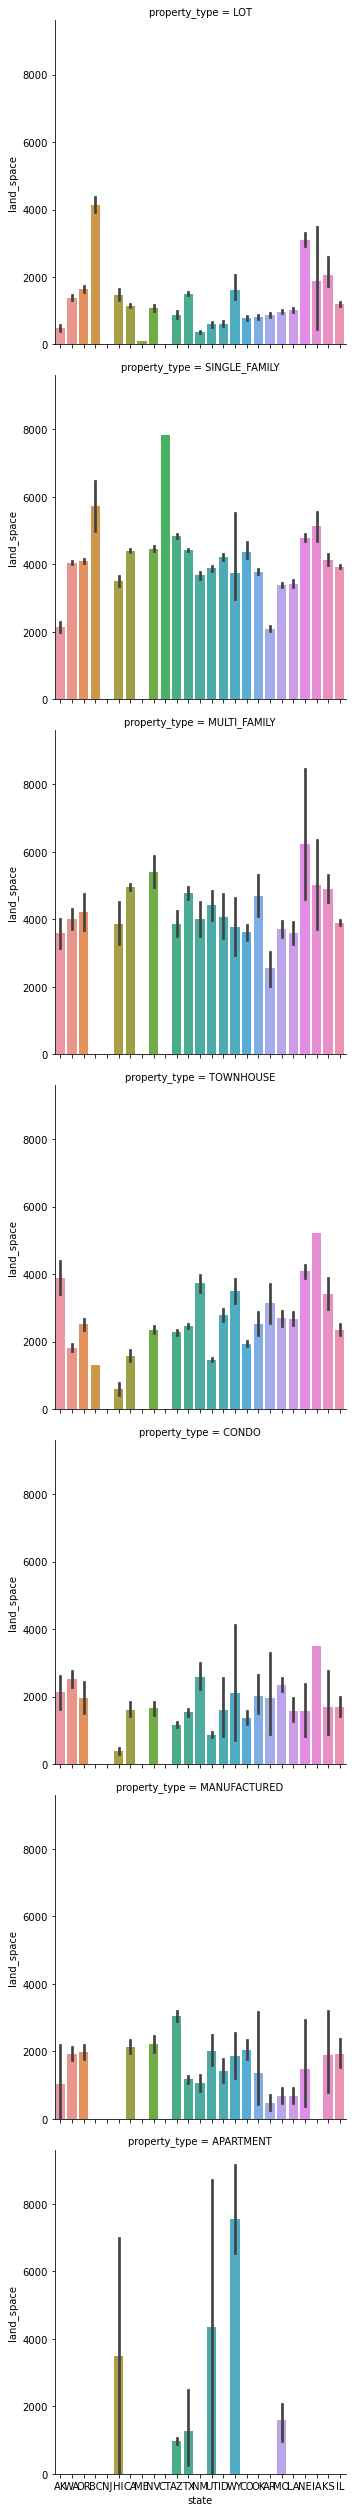

In [13]:
sns.catplot(
    data=df, x="state", y="land_space", row="property_type",
    kind="bar"
)

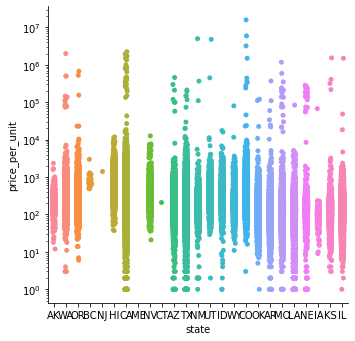

In [14]:
catplot = sns.catplot(data=df, x="state", y="price_per_unit")
catplot.set(yscale="log")

<AxesSubplot:>

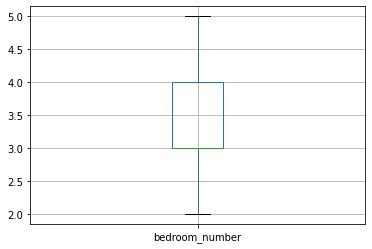

In [15]:
df.boxplot('bedroom_number', showfliers = False)

<AxesSubplot:>

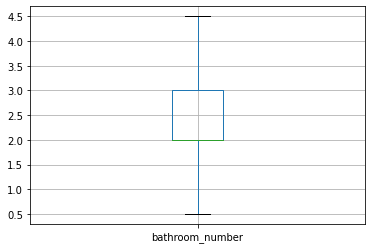

In [16]:
df.boxplot('bathroom_number', showfliers = False)

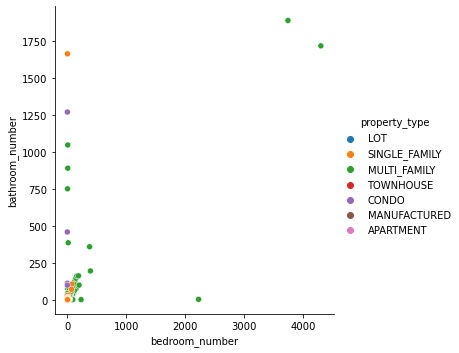

In [17]:
sns.relplot(x="bedroom_number", y="bathroom_number", hue="property_type", data=df)

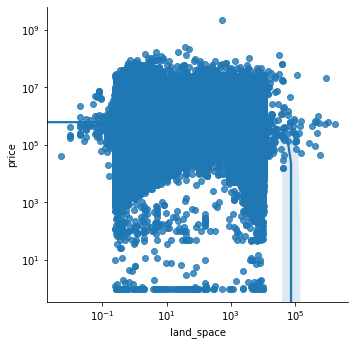

In [18]:
lmplot = sns.lmplot(x="land_space", y="price", data=df)
lmplot.set(xscale="log", yscale="log")

In [19]:
special_variables=['property_url',
 'address',
 'street_name',
 'apartment',
 'RunDate',
 'agency_name',
 'land_space_unit',
 'land_space_unit',
 'broker_id',
 'property_status',
 'year_build',
 'total_num_units',
 'agent_name',
 'agent_phone',
 'city',
 'postcode']

In [20]:
categorical_variables=[name for name, is_cat in zip(description.columns, description.loc['mean'].isna()) if is_cat and name not in special_variables]
categorical_variables

['state', 'property_type']

In [21]:
df.isna().sum()

property_url               0
property_id                0
address                    0
street_name              131
apartment             585185
city                       1
state                      1
latitude               70878
longitude              70878
postcode                  30
price                      0
bedroom_number        156155
bathroom_number       128267
price_per_unit        164635
living_space          152153
land_space             84881
land_space_unit        84881
broker_id             600000
property_type              0
property_status            0
year_build            600000
total_num_units       600000
listing_age                0
RunDate                    0
agency_name           155476
agent_name            600000
agent_phone           600000
is_owned_by_zillow         0
dtype: int64

In [22]:
df_isna=df.isna()
df_isna

,property_url,property_id,address,street_name,apartment,city,state,latitude,longitude,postcode,...,property_type,property_status,year_build,total_num_units,listing_age,RunDate,agency_name,agent_name,agent_phone,is_owned_by_zillow
0,False,False,False,False,True,False,False,True,True,False,...,False,False,True,True,False,False,False,True,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,True,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,True,True,False
3,False,False,False,False,True,False,False,True,True,False,...,False,False,True,True,False,False,False,True,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
599996,False,False,False,False,True,False,False,True,True,False,...,False,False,True,True,False,False,False,True,True,False
599997,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
599998,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False


In [23]:
df_isna.columns=[c for c in df_isna.columns]
df_isna

,property_url,property_id,address,street_name,apartment,city,state,latitude,longitude,postcode,...,property_type,property_status,year_build,total_num_units,listing_age,RunDate,agency_name,agent_name,agent_phone,is_owned_by_zillow
0,False,False,False,False,True,False,False,True,True,False,...,False,False,True,True,False,False,False,True,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,True,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,True,True,False
3,False,False,False,False,True,False,False,True,True,False,...,False,False,True,True,False,False,False,True,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
599996,False,False,False,False,True,False,False,True,True,False,...,False,False,True,True,False,False,False,True,True,False
599997,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
599998,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False


In [24]:
df_isna.columns=[c+'_isna' for c in df_isna.columns]
df_isna

,property_url_isna,property_id_isna,address_isna,street_name_isna,apartment_isna,city_isna,state_isna,latitude_isna,longitude_isna,postcode_isna,...,property_type_isna,property_status_isna,year_build_isna,total_num_units_isna,listing_age_isna,RunDate_isna,agency_name_isna,agent_name_isna,agent_phone_isna,is_owned_by_zillow_isna
0,False,False,False,False,True,False,False,True,True,False,...,False,False,True,True,False,False,False,True,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,True,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,True,True,False
3,False,False,False,False,True,False,False,True,True,False,...,False,False,True,True,False,False,False,True,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
599996,False,False,False,False,True,False,False,True,True,False,...,False,False,True,True,False,False,False,True,True,False
599997,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
599998,False,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False


In [25]:
df=pd.concat([df.fillna(0), df_isna.astype(float)], axis=1)
df

,property_url,property_id,address,street_name,apartment,city,state,latitude,longitude,postcode,...,property_type_isna,property_status_isna,year_build_isna,total_num_units_isna,listing_age_isna,RunDate_isna,agency_name_isna,agent_name_isna,agent_phone_isna,is_owned_by_zillow_isna
0,https://www.zillow.com/homedetails/3-Plat-83-1...,2064212272,"3 Plat #83-10, Wrangell, AK 99929",Plat #83-10,0,Wrangell,AK,0.000000,0.000000,99929,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,https://www.zillow.com/homedetails/117-3rd-St-...,249518113,"117 3rd St, Wrangell, AK 99929",3rd St,0,Wrangell,AK,56.474518,-132.386000,99929,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,https://www.zillow.com/homedetails/LOT-2A-Fron...,2077729913,"LOT 2A Front St, Wrangell, AK 99929",LOT 2A Front St,0,Wrangell,AK,56.471638,-132.386860,99929,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3,https://www.zillow.com/homedetails/LOT-A-Plat-...,2067488502,"LOT A Plat #2009-6, Wrangell, AK 99929",LOT A Plat #2009-6,0,Wrangell,AK,0.000000,0.000000,99929,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,https://www.zillow.com/homedetails/335-Cassiar...,249518139,"335 Cassiar St, Wrangell, AK 99929",Cassiar St,0,Wrangell,AK,56.475697,-132.389050,99929,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,https://www.zillow.com/homedetails/6317-Virgin...,4303608,"6317 Virginia Ln, Matteson, IL 60443",Virginia Ln,0,Matteson,IL,41.523070,-87.769340,60443,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
599996,https://www.zillow.com/homedetails/LOT-16-Ray-...,2078144422,"LOT 16 Ray Ave, West Chicago, IL 60185",LOT 16 Ray Ave,0,West Chicago,IL,0.000000,0.000000,60185,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
599997,https://www.zillow.com/homedetails/12S135-Lemo...,4604875,"12S135 Lemont Rd, Lemont, IL 60439",135 Lemont Rd,0,Lemont,IL,41.697723,-88.003746,60439,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
599998,https://www.zillow.com/homedetails/4701-Abbey-...,65578365,"4701 Abbey Ln, Matteson, IL 60443",Abbey Ln,0,Matteson,IL,41.519527,-87.730644,60443,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [26]:
# A crucial categorical feature 'property_type' is categorical variable so I wanted to transform that to a numeric one
dummies=pd.get_dummies(df[categorical_variables])
dummies

,state_0,state_AK,state_AR,state_AZ,state_BC,state_CA,state_CO,state_CT,state_HI,state_IA,...,state_UT,state_WA,state_WY,property_type_APARTMENT,property_type_CONDO,property_type_LOT,property_type_MANUFACTURED,property_type_MULTI_FAMILY,property_type_SINGLE_FAMILY,property_type_TOWNHOUSE
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
599996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
599997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
599998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
df = pd.concat([df,dummies],axis='columns')
df

,property_url,property_id,address,street_name,apartment,city,state,latitude,longitude,postcode,...,state_UT,state_WA,state_WY,property_type_APARTMENT,property_type_CONDO,property_type_LOT,property_type_MANUFACTURED,property_type_MULTI_FAMILY,property_type_SINGLE_FAMILY,property_type_TOWNHOUSE
0,https://www.zillow.com/homedetails/3-Plat-83-1...,2064212272,"3 Plat #83-10, Wrangell, AK 99929",Plat #83-10,0,Wrangell,AK,0.000000,0.000000,99929,...,0,0,0,0,0,1,0,0,0,0
1,https://www.zillow.com/homedetails/117-3rd-St-...,249518113,"117 3rd St, Wrangell, AK 99929",3rd St,0,Wrangell,AK,56.474518,-132.386000,99929,...,0,0,0,0,0,0,0,0,1,0
2,https://www.zillow.com/homedetails/LOT-2A-Fron...,2077729913,"LOT 2A Front St, Wrangell, AK 99929",LOT 2A Front St,0,Wrangell,AK,56.471638,-132.386860,99929,...,0,0,0,0,0,1,0,0,0,0
3,https://www.zillow.com/homedetails/LOT-A-Plat-...,2067488502,"LOT A Plat #2009-6, Wrangell, AK 99929",LOT A Plat #2009-6,0,Wrangell,AK,0.000000,0.000000,99929,...,0,0,0,0,0,0,0,0,1,0
4,https://www.zillow.com/homedetails/335-Cassiar...,249518139,"335 Cassiar St, Wrangell, AK 99929",Cassiar St,0,Wrangell,AK,56.475697,-132.389050,99929,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,https://www.zillow.com/homedetails/6317-Virgin...,4303608,"6317 Virginia Ln, Matteson, IL 60443",Virginia Ln,0,Matteson,IL,41.523070,-87.769340,60443,...,0,0,0,0,0,0,0,0,1,0
599996,https://www.zillow.com/homedetails/LOT-16-Ray-...,2078144422,"LOT 16 Ray Ave, West Chicago, IL 60185",LOT 16 Ray Ave,0,West Chicago,IL,0.000000,0.000000,60185,...,0,0,0,0,0,1,0,0,0,0
599997,https://www.zillow.com/homedetails/12S135-Lemo...,4604875,"12S135 Lemont Rd, Lemont, IL 60439",135 Lemont Rd,0,Lemont,IL,41.697723,-88.003746,60439,...,0,0,0,0,0,0,0,0,1,0
599998,https://www.zillow.com/homedetails/4701-Abbey-...,65578365,"4701 Abbey Ln, Matteson, IL 60443",Abbey Ln,0,Matteson,IL,41.519527,-87.730644,60443,...,0,0,0,0,0,0,0,0,1,0


In [28]:
df[['land_space','land_space_unit']]

,land_space,land_space_unit
0,3.8860,acres
1,7492.0000,sqft
2,7222.0000,sqft
3,61.9705,acres
4,10436.0000,sqft
...,...,...
599995,10375.9920,sqft
599996,0.2600,acres
599997,4.8204,acres
599998,10193.0400,sqft


In [29]:
#Land space is an important metric for the price of the house but this dataset has multiple units
#All the values with 'acres' unit changed to 'sqft'
df.loc[df['land_space_unit']=='acres', 'land_space'] = df['land_space']*43560.00
df.loc[df['land_space_unit']=='acres', 'land_space_unit']='sqft'
df[['land_space','land_space_unit']]

,land_space,land_space_unit
0,169274.160,sqft
1,7492.000,sqft
2,7222.000,sqft
3,2699434.980,sqft
4,10436.000,sqft
...,...,...
599995,10375.992,sqft
599996,11325.600,sqft
599997,209976.624,sqft
599998,10193.040,sqft


In [30]:
df["city"]=df["city"].apply(str)

In [31]:
#Since the number of cities is too many and the Dummy Variable Encoding process consumes a long time and memory, 
#its instead, ordinal encoding is done.

labelencoder = LabelEncoder()
df['city_encoded'] = labelencoder.fit_transform(df['city'])
df['city_encoded'].head()

0    7882
1    7882
2    7882
3    7882
4    7882
Name: city_encoded, dtype: int32

In [32]:
features=df.describe().columns
features

Index(['property_id', 'latitude', 'longitude', 'price', 'bedroom_number',
       'bathroom_number', 'price_per_unit', 'living_space', 'land_space',
       'broker_id', 'year_build', 'total_num_units', 'listing_age',
       'agent_name', 'agent_phone', 'is_owned_by_zillow', 'property_url_isna',
       'property_id_isna', 'address_isna', 'street_name_isna',
       'apartment_isna', 'city_isna', 'state_isna', 'latitude_isna',
       'longitude_isna', 'postcode_isna', 'price_isna', 'bedroom_number_isna',
       'bathroom_number_isna', 'price_per_unit_isna', 'living_space_isna',
       'land_space_isna', 'land_space_unit_isna', 'broker_id_isna',
       'property_type_isna', 'property_status_isna', 'year_build_isna',
       'total_num_units_isna', 'listing_age_isna', 'RunDate_isna',
       'agency_name_isna', 'agent_name_isna', 'agent_phone_isna',
       'is_owned_by_zillow_isna', 'state_0', 'state_AK', 'state_AR',
       'state_AZ', 'state_BC', 'state_CA', 'state_CO', 'state_CT', 'state_HI'

In [33]:
df = df.drop_duplicates()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 90 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   property_url                 600000 non-null  object 
 1   property_id                  600000 non-null  int64  
 2   address                      600000 non-null  object 
 3   street_name                  600000 non-null  object 
 4   apartment                    600000 non-null  object 
 5   city                         600000 non-null  object 
 6   state                        600000 non-null  object 
 7   latitude                     600000 non-null  float64
 8   longitude                    600000 non-null  float64
 9   postcode                     600000 non-null  object 
 10  price                        600000 non-null  float64
 11  bedroom_number               600000 non-null  float64
 12  bathroom_number              600000 non-null  float64
 13 

In [35]:
targets=['price','price_per_unit']
targets

['price', 'price_per_unit']

In [36]:
features=['latitude', 'longitude', 'bedroom_number', 'bathroom_number', 'living_space', 'land_space', 'city_encoded', 'state_0', 'state_AK', 'state_AR',
       'state_AZ', 'state_BC', 'state_CA', 'state_CO', 'state_CT', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_KS', 'state_LA', 'state_ME',
       'state_MO', 'state_NE', 'state_NJ', 'state_NM', 'state_NV', 'state_OK',
       'state_OR', 'state_TX', 'state_UT', 'state_WA', 'state_WY',
       'property_type_APARTMENT', 'property_type_CONDO', 'property_type_LOT',
       'property_type_MANUFACTURED', 'property_type_MULTI_FAMILY',
       'property_type_SINGLE_FAMILY', 'property_type_TOWNHOUSE']

features=[c for c in df.describe().columns if not c.lower().startswith('price')]

In [37]:
df=pd.concat([df.fillna(0), df_isna.astype(float)], axis=1)
df

,property_url,property_id,address,street_name,apartment,city,state,latitude,longitude,postcode,...,property_type_isna,property_status_isna,year_build_isna,total_num_units_isna,listing_age_isna,RunDate_isna,agency_name_isna,agent_name_isna,agent_phone_isna,is_owned_by_zillow_isna
0,https://www.zillow.com/homedetails/3-Plat-83-1...,2064212272,"3 Plat #83-10, Wrangell, AK 99929",Plat #83-10,0,Wrangell,AK,0.000000,0.000000,99929,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,https://www.zillow.com/homedetails/117-3rd-St-...,249518113,"117 3rd St, Wrangell, AK 99929",3rd St,0,Wrangell,AK,56.474518,-132.386000,99929,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,https://www.zillow.com/homedetails/LOT-2A-Fron...,2077729913,"LOT 2A Front St, Wrangell, AK 99929",LOT 2A Front St,0,Wrangell,AK,56.471638,-132.386860,99929,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3,https://www.zillow.com/homedetails/LOT-A-Plat-...,2067488502,"LOT A Plat #2009-6, Wrangell, AK 99929",LOT A Plat #2009-6,0,Wrangell,AK,0.000000,0.000000,99929,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,https://www.zillow.com/homedetails/335-Cassiar...,249518139,"335 Cassiar St, Wrangell, AK 99929",Cassiar St,0,Wrangell,AK,56.475697,-132.389050,99929,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,https://www.zillow.com/homedetails/6317-Virgin...,4303608,"6317 Virginia Ln, Matteson, IL 60443",Virginia Ln,0,Matteson,IL,41.523070,-87.769340,60443,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
599996,https://www.zillow.com/homedetails/LOT-16-Ray-...,2078144422,"LOT 16 Ray Ave, West Chicago, IL 60185",LOT 16 Ray Ave,0,West Chicago,IL,0.000000,0.000000,60185,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
599997,https://www.zillow.com/homedetails/12S135-Lemo...,4604875,"12S135 Lemont Rd, Lemont, IL 60439",135 Lemont Rd,0,Lemont,IL,41.697723,-88.003746,60439,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
599998,https://www.zillow.com/homedetails/4701-Abbey-...,65578365,"4701 Abbey Ln, Matteson, IL 60443",Abbey Ln,0,Matteson,IL,41.519527,-87.730644,60443,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [38]:
X=df[features]
X

,latitude,longitude,bedroom_number,bathroom_number,living_space,land_space,city_encoded,state_0,state_AK,state_AR,...,state_UT,state_WA,state_WY,property_type_APARTMENT,property_type_CONDO,property_type_LOT,property_type_MANUFACTURED,property_type_MULTI_FAMILY,property_type_SINGLE_FAMILY,property_type_TOWNHOUSE
0,0.000000,0.000000,0.0,0.0,0.0,169274.160,7882,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,56.474518,-132.386000,3.0,3.0,2478.0,7492.000,7882,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,56.471638,-132.386860,0.0,0.0,0.0,7222.000,7882,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.000000,0.000000,3.0,1.0,1500.0,2699434.980,7882,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,56.475697,-132.389050,5.0,3.0,2080.0,10436.000,7882,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,41.523070,-87.769340,4.0,3.0,2600.0,10375.992,4414,0,0,0,...,0,0,0,0,0,0,0,0,1,0
599996,0.000000,0.000000,0.0,0.0,0.0,11325.600,7642,0,0,0,...,0,0,0,0,0,1,0,0,0,0
599997,41.697723,-88.003746,3.0,3.0,3373.0,209976.624,3992,0,0,0,...,0,0,0,0,0,0,0,0,1,0
599998,41.519527,-87.730644,5.0,4.0,3301.0,10193.040,4414,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
y=df[targets[0]]
y

0         135000.0
1         589500.0
2          99999.0
3         495000.0
4         405000.0
            ...   
599995    350000.0
599996     29900.0
599997    859000.0
599998    465000.0
599999    310000.0
Name: price, Length: 600000, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=21)
len(x_train),len(x_test),len(y_train),len(y_test)

(420000, 180000, 420000, 180000)

**Linear Regression Model**

In [41]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)

In [43]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

436972.20192431303
2104495269001.2185
1450687.860637573


In [44]:
model.score(x_train , y_train)

0.00914681893561664

**Multiple Linear Regression Model**

In [45]:
MLR = sm.OLS(y_train, x_train)

In [46]:
MLR_results = MLR.fit()

In [47]:
MLR_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     107.7
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:42:42   Log-Likelihood:            -6.9423e+06
No. Observations:              420000   AIC:                         1.388e+07
Df Residuals:                  419963   BIC:                         1.389e+07
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
latitude                    -1.314e+04   2575.854     -5.101      0.000   -1.82e+04   -8091.674
longitude                   -4882.3085    898.406     -5.434      0.000   -6643.157   -3121.460
bedroom_number               -195.1665    265.820     -0.734      0.463    -716.165     325.832
bathroom_number               2.39e+04   1127.299     21.203      0.000    2.17e+04    2.61e+04
living_space                    0.2897      0.033      8.792      0.000       0.225       0.354
land_space                      0.0001   3.57e-05      2.802      0.005    3.01e-05       0.000
city_encoded                   -8.4693      2.542     -3.332      0.001     -13.452      -3.487
state_0                     -5.462e-05      0.001     -0.087      0.931      -0.001       0.001
state_AK                    -4.769e+04    1.8e+05     -0.265      0.791      -4e+05    3.04e+05
state_AR                    -1.563e+05   1.71e+05     -0.913      0.361   -4.92e+05    1.79e+05
state_AZ                     3123.5861    1.7e+05      0.018      0.985    -3.3e+05    3.36e+05
state_BC                     1.478e+06   5.77e+05      2.563      0.010    3.48e+05    2.61e+06
state_CA                     5.147e+05   1.69e+05      3.040      0.002    1.83e+05    8.47e+05
state_CO                     3.947e+05    1.7e+05      2.320      0.020    6.12e+04    7.28e+05
state_CT                     1.438e+05   3.54e+06      0.041      0.968   -6.79e+06    7.07e+06
state_HI                     3.481e+05   1.93e+05      1.800      0.072   -3.09e+04    7.27e+05
state_IA                    -2.431e+05   3.42e+05     -0.712      0.477   -9.13e+05    4.26e+05
state_ID                     2.859e+05   1.72e+05      1.658      0.097   -5.21e+04    6.24e+05
state_IL                    -3.044e+04   1.71e+05     -0.178      0.859   -3.66e+05    3.05e+05
state_KS                    -1.102e+05   1.73e+05     -0.637      0.524   -4.49e+05    2.29e+05
state_LA                    -1.849e+05    1.7e+05     -1.085      0.278   -5.19e+05    1.49e+05
state_ME                    -4.093e+05   3.54e+06     -0.116      0.908   -7.34e+06    6.52e+06
state_MO                     -1.09e+05    1.7e+05     -0.640      0.522   -4.43e+05    2.25e+05
state_NE                    -1.058e+05   1.75e+05     -0.604      0.546   -4.49e+05    2.37e+05
state_NJ                     7.441e-07   8.64e-06      0.086      0.931   -1.62e-05    1.77e-05
state_NM                    -1.318e+05   1.72e+05     -0.764      0.445    -4.7e+05    2.06e+05
state_NV                     1.028e+05   1.72e+05      0.599      0.549   -2.34e+05    4.39e+05
state_OK                    -1.492e+05   1.71e+05     -0.875      0.382   -4.84e+05    1.85e+05
state_OR                     1.355e+05   1.71e+05      0.793      0.428   -1.99e+05     4.7e+05
state_TX   

In [48]:
mlr_pred = MLR_results.predict(x_test)

In [49]:
print(metrics.mean_absolute_error(y_test,mlr_pred))
print(metrics.mean_squared_error(y_test,mlr_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,mlr_pred)))

436972.20194670866
2104498111546.8657
1450688.8403606287


In [50]:
data2 = pd.DataFrame()
data2['prediction'] = MLR_results.predict(X)
data2['price'] = df['price']
data2[['prediction','price']]

,prediction,price
0,205675.738376,135000.0
1,387802.342362,589500.0
2,109960.404515,99999.0
3,435725.203728,495000.0
4,387296.393413,405000.0
...,...,...
599995,412899.893664,350000.0
599996,224944.449401,29900.0
599997,415762.483064,859000.0
599998,436667.660229,465000.0


In [51]:
data2.corr()

,prediction,price
prediction,1.00000,0.11036
price,0.11036,1.00000


**Random Forest Model**

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfm=RandomForestRegressor()
rfm.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
print(rfm.score(x_train,y_train))

0.8898732895488942


In [54]:
rfm_pred=rfm.predict(x_test)
rfm_pred

array([  92701.90333333, 3798231.974     ,  614231.91      , ...,
        527289.43      ,  467346.        ,  410751.19566667])

In [55]:
print(metrics.mean_absolute_error(y_test,rfm_pred))
print(metrics.mean_squared_error(y_test,rfm_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,rfm_pred)))

207430.79302089167
2407609834186.1724
1551647.45808646


In [56]:
data = pd.DataFrame()
data['prediction'] = rfm.predict(X)
data['price'] = df['price']
data[['prediction','price']]

,prediction,price
0,56498.000000,135000.0
1,689239.760000,589500.0
2,81188.400000,99999.0
3,491645.750000,495000.0
4,490813.450000,405000.0
...,...,...
599995,412389.800000,350000.0
599996,33708.517222,29900.0
599997,813727.890000,859000.0
599998,476115.680000,465000.0


In [57]:
data.corr()

,prediction,price
prediction,1.000000,0.922072
price,0.922072,1.000000
